In [1]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1CcOQq44Ed7kby_UDd1I2oT8Pod9Ptl-u"})   # replace the id with id of file you want to access
downloaded.GetContentFile('auto-mpg.csv')        # replace the file name with your file

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cars=pd.read_csv('auto-mpg.csv')

In [4]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
cars = cars.drop(columns = ['horsepower', 'acceleration', 'model year', 'origin', 'car name'])

In [6]:
cars

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449
...,...,...,...,...
393,27.0,4,140.0,2790
394,44.0,4,97.0,2130
395,32.0,4,135.0,2295
396,28.0,4,120.0,2625


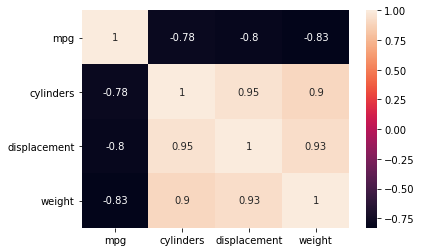

In [7]:
import seaborn as sns
correlation_matrix=cars.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)
#From the correlation matrix identify strongest correlators to mpg

Text(0, 0.5, 'mpg')

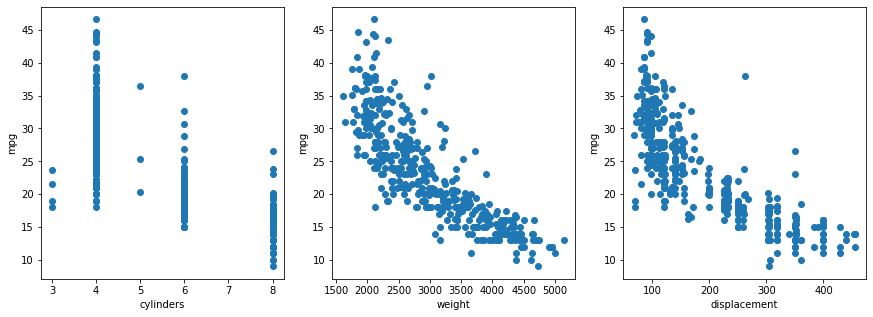

In [8]:
#Strong correlation of mpg with cylinder, displacement and weight very small correlation with brand name
import matplotlib.pyplot as plt
plt.figure(figsize = [20,5])
plt.subplot(1,4,1)
plt.scatter(cars['cylinders'],cars['mpg'])
plt.xlabel('cylinders')
plt.ylabel('mpg')

plt.subplot(1,4,2)
plt.scatter(cars['weight'],cars['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')

plt.subplot(1,4,3)
plt.scatter(cars['displacement'],cars['mpg'])
plt.xlabel('displacement')
plt.ylabel('mpg')


In [9]:
#Create the training set
#Shuffle and copy 200 rows. Extract the mpg row as the target (train_sety)
from sklearn.utils import shuffle
cars = shuffle(cars)

displacement_sqr=np.square(cars['displacement'])
weight_sqr=np.square(cars['weight'])

train_Set = cars[:200]
train_sety = train_Set['mpg'];
train_setx = train_Set.drop(columns = ['mpg'])

In [10]:
train_Set['displacement_sqr']=displacement_sqr
train_Set['weight_sqr']=weight_sqr
train_Set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mpg,cylinders,displacement,weight,displacement_sqr,weight_sqr
27,11.0,8,318.0,4382,101124.0,19201924
314,26.4,4,140.0,2870,19600.0,8236900
24,21.0,6,199.0,2648,39601.0,7011904
14,24.0,4,113.0,2372,12769.0,5626384
17,21.0,6,200.0,2587,40000.0,6692569
...,...,...,...,...,...,...
43,13.0,8,400.0,4746,160000.0,22524516
236,25.5,4,140.0,2755,19600.0,7590025
340,25.8,4,156.0,2620,24336.0,6864400
379,36.0,4,98.0,2125,9604.0,4515625


In [11]:
#Create the test set
#copy alls rows after 200. Extract the mpg row as the target (test_sety)
test_Set = cars[200:]
test_sety = test_Set['mpg'];
test_setx = test_Set.drop(columns = ['mpg'])

In [12]:
import random
random.seed(1)
theta0 = random.uniform(-1,1);
theta1 = random.uniform(-1,1);
theta2 = random.uniform(-1,1);
theta3 = random.uniform(-1,1);
theta4 = random.uniform(-1,1);

In [13]:
import numpy as np

X1 = train_Set['weight'];
X2 = np.square(train_Set['weight'])

X3 = train_Set['displacement']
X4 = np.square(train_Set['displacement'])


M1= np.mean(X1);
S1 = np.std(X1);
X1 = (X1 - M1)/S1;

M2= np.mean(X2);
S2 = np.std(X2);
X2 = (X2 - M2)/S2;

M3= np.mean(X3);
S3 = np.std(X3);
X3 = (X3 - M3)/S3;

M4= np.mean(X4);
S4 = np.std(X4);
X4 = (X4 - M4)/S4;


Y = train_sety
L = len(X1)
alpha = 0.5;

Error =  656.1741243858118 theta0 =  23.598 theta1 =  -6.184951921848142 theta2 =  0.6727647192048678 theta3 =  -0.48986194852115633 theta4 =  -0.009129825816118027 

Error =  16.907669638379556 theta0 =  23.598000000000003 theta1 =  -6.329062671676773 theta2 =  0.815779141890165 theta3 =  -0.4898619485211562 theta4 =  -0.00912982581611824 

Error =  16.866448605067376 theta0 =  23.598000000000003 theta1 =  -6.47098910756258 theta2 =  0.9566258678708921 theta3 =  -0.4898619485211563 theta4 =  -0.009129825816117956 

Error =  16.826467691644638 theta0 =  23.598000000000003 theta1 =  -6.6107643375659 theta2 =  1.0953377533367603 theta3 =  -0.4898619485211561 theta4 =  -0.009129825816118275 

Error =  16.78768958955266 theta0 =  23.598000000000003 theta1 =  -6.74842096792193 theta2 =  1.231947156469985 theta3 =  -0.4898619485211558 theta4 =  -0.009129825816118061 

Error =  16.75007811264727 theta0 =  23.598000000000003 theta1 =  -6.883991110646977 theta2 =  1.3664859449936844 theta3 =  -

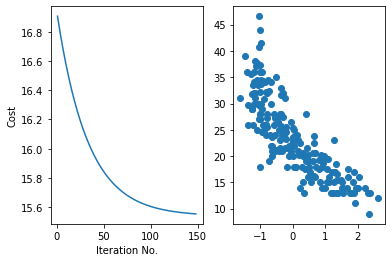

In [14]:
iteration_Nos = range(1, 150)
err_F = [None] * len(iteration_Nos)

for i in iteration_Nos:
    h = ((1/L)*np.sum(np.square(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4 - Y)))
    err_F[i-1] = h;
    theta0 = theta0 - (alpha/L)*np.sum((2*(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4 - Y)));
    theta1 = theta1 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4 - Y),X1));
    theta2 = theta2 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4 - Y),X2));
    theta3 = theta3 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4 - Y),X2));
    theta4 = theta4 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4 - Y),X2));

    plt.clf()
    plt.subplot(1,2,1);
    plt.plot(range(1, i), err_F[1:i])
    plt.xlabel('Iteration No.')
    plt.ylabel('Cost')
    
    plt.subplot(1,2,2);
    plt.scatter(X1, Y)
    X_R = np.arange(np.min(train_setx['weight']),np.max(train_setx['weight']), 0.1);
    # create a x axis with  min to max
    X_R2 = np.square(X_R);
    X_R = (X_R-M1)/S1;
    X_R2 = (X_R2 - M2)/S2;
    #plt.plot(X_R, theta0 + theta1*X_R+ theta2*X_R2, 'r');
    #plt.show()
    #ploting the red line
    print('Error = ',h, 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2,'theta3 = ', theta3,'theta4 = ', theta4,'\n')

#Assignment 1 (1)
Modify the above linear regression code to add regularization.

#Assignment 2 (2)
Use linearregression model from sci-kit learn package to predict milage (M) only using weight (W). Produce 20 models of increasing complexity:
$$M = \theta_{0} + \theta_{1}W+ \theta_{2}W^2 ... +\theta_{i}W^i$$
Vary i from 0 to 20 and plot i vs training and test errors. Each model variation is to be trained on 100 epochs.

#Assignment 3 (1)
Use the functions available within Sci-kit learn to implement K-Fold cross validation for the following five models:
$$1. \space M = \theta_{0} + \theta_{1}W+ \theta_{2}D$$
$$2. \space M = \theta_{0} + \theta_{1}W^2+ \theta_{2}D$$
$$3. \space M = \theta_{0} + \theta_{1}W+ \theta_{2}D^2$$
$$4. \space M = \theta_{0} + \theta_{1}W^2+ \theta_{2}D^2$$
$$5. \space M = \theta_{0} + \theta_{1}W^2+ \theta_{2}D^2 + \theta_{3}DW$$

$$For \space the \space best \space model, \space find \space the \space\theta_{i} \space values \space by \space employing \space the \space whole \space dataset.$$ 

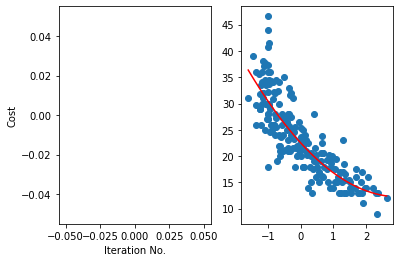

Error =  16.036046870097845 theta0 =  23.598000000000003 theta1 =  -15.175180934347944 theta2 =  9.137414397099619 



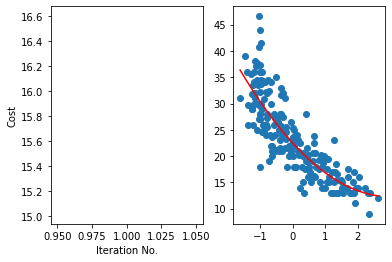

Error =  15.81101770257022 theta0 =  23.598000000000003 theta1 =  -15.188469197546324 theta2 =  9.150601569410265 



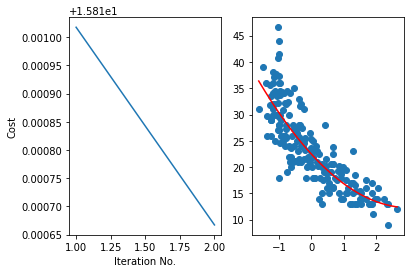

Error =  15.810667223117841 theta0 =  23.598000000000003 theta1 =  -15.2015560480214 theta2 =  9.163588861251348 



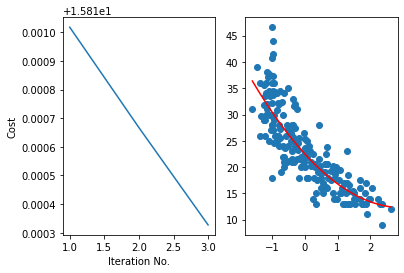

Error =  15.81032728771312 theta0 =  23.598000000000003 theta1 =  -15.214444538623988 theta2 =  9.176379302249025 



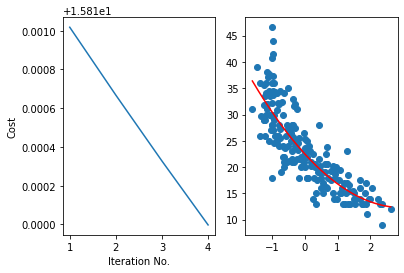

Error =  15.809997579142191 theta0 =  23.598000000000003 theta1 =  -15.22713767593226 theta2 =  9.188975876108826 



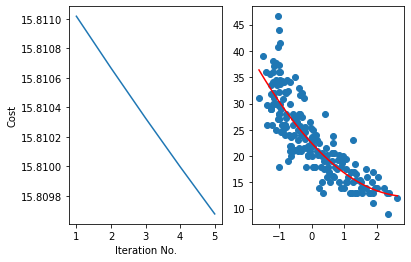

Error =  15.809677789734458 theta0 =  23.598000000000003 theta1 =  -15.239638420953117 theta2 =  9.2013815213117 



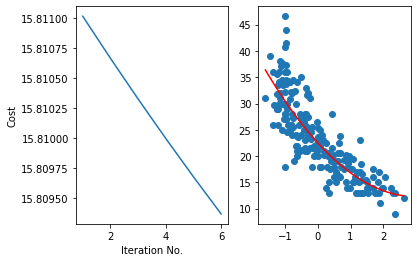

Error =  15.809367621075483 theta0 =  23.598000000000003 theta1 =  -15.251949689812916 theta2 =  9.213599131799475 



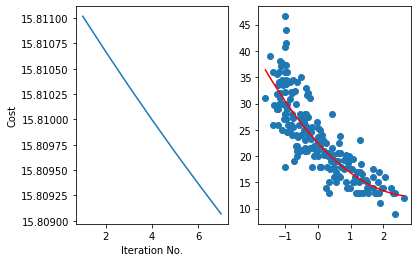

Error =  15.809066783728513 theta0 =  23.598000000000003 theta1 =  -15.264074354437733 theta2 =  9.225631557649962 



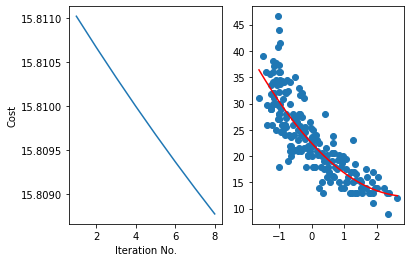

Error =  15.808774996964404 theta0 =  23.598000000000003 theta1 =  -15.27601524322332 theta2 =  9.2374816057418 



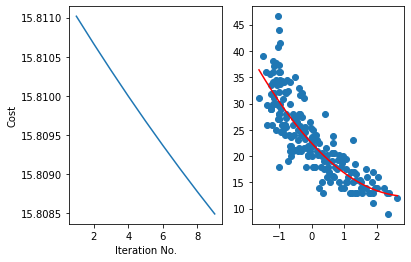

Error =  15.808491988499636 theta0 =  23.598000000000003 theta1 =  -15.287775141694894 theta2 =  9.249152040409234 



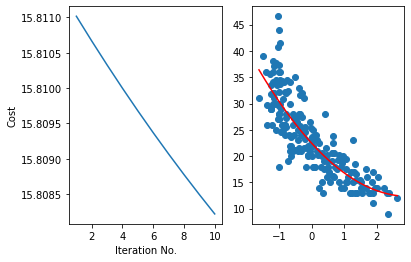

Error =  15.808217494242244 theta0 =  23.598000000000003 theta1 =  -15.29935679315694 theta2 =  9.260645584086971 



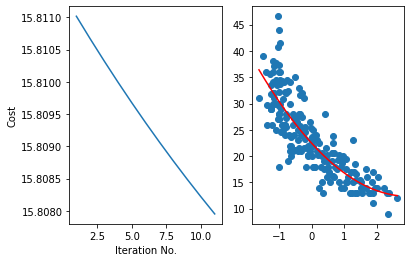

Error =  15.807951258045382 theta0 =  23.598000000000003 theta1 =  -15.310762899333161 theta2 =  9.271964917945265 



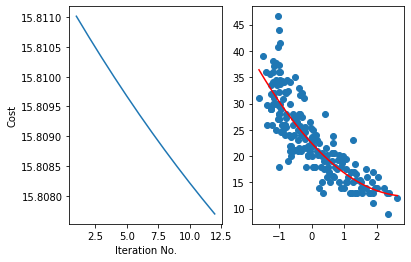

Error =  15.807693031468284 theta0 =  23.598000000000003 theta1 =  -15.321996120996715 theta2 =  9.283112682515359 



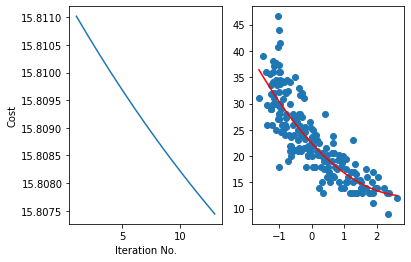

Error =  15.807442573544433 theta0 =  23.598000000000003 theta1 =  -15.33305907859092 theta2 =  9.294091478305461 



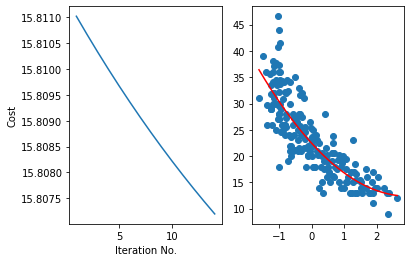

Error =  15.807199650556704 theta0 =  23.598000000000003 theta1 =  -15.34395435284054 theta2 =  9.304903866407393 



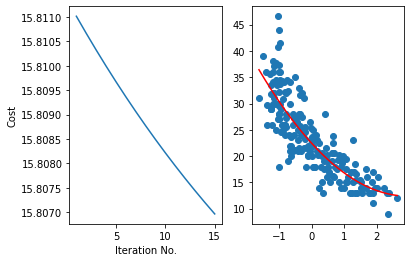

Error =  15.806964035819258 theta0 =  23.598000000000003 theta1 =  -15.354684485353806 theta2 =  9.315552369094014 



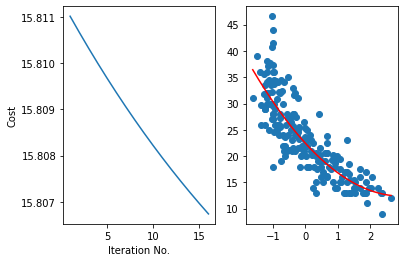

Error =  15.80673550946604 theta0 =  23.598000000000003 theta1 =  -15.365251979215303 theta2 =  9.32603947040762 



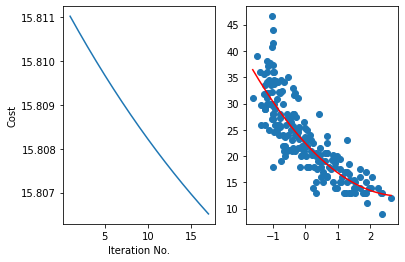

Error =  15.806513858245564 theta0 =  23.598000000000003 theta1 =  -15.3756592995699 theta2 =  9.336367616739407 



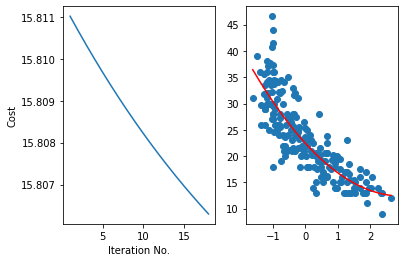

Error =  15.806298875321955 theta0 =  23.598000000000003 theta1 =  -15.38590887419779 theta2 =  9.346539217400153 



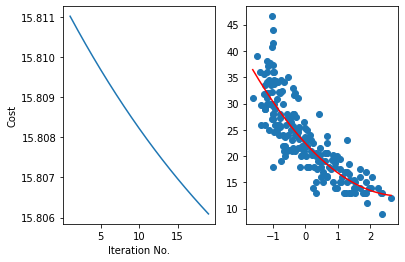

Error =  15.806090360081894 theta0 =  23.598000000000003 theta1 =  -15.396003094080843 theta2 =  9.356556645182257 



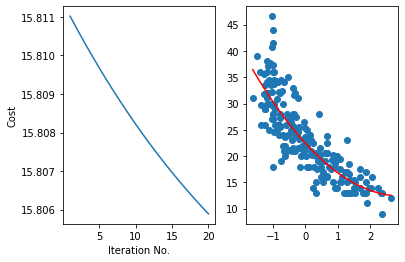

Error =  15.805888117947482 theta0 =  23.598000000000003 theta1 =  -15.405944313960367 theta2 =  9.366422236913259 



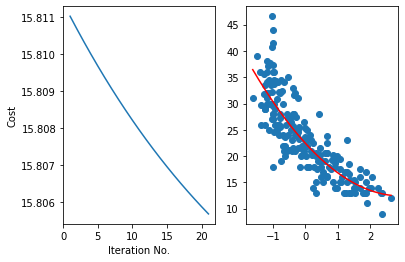

Error =  15.805691960194583 theta0 =  23.598000000000003 theta1 =  -15.415734852886407 theta2 =  9.376138294000954 



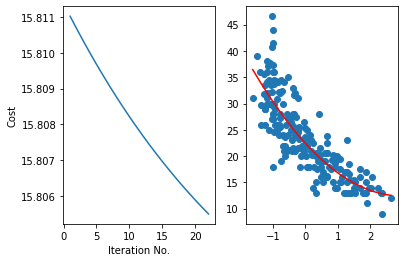

Error =  15.805501703776791 theta0 =  23.598000000000003 theta1 =  -15.425376994758727 theta2 =  9.385707082970265 



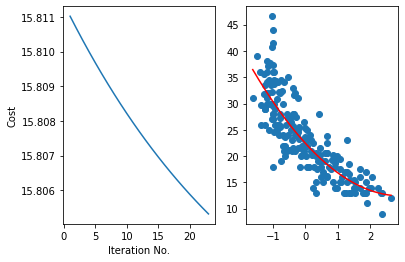

Error =  15.805317171154567 theta0 =  23.598000000000003 theta1 =  -15.434872988859588 theta2 =  9.39513083599197 



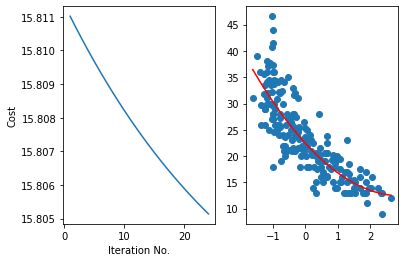

Error =  15.805138190129588 theta0 =  23.598000000000003 theta1 =  -15.44422505037846 theta2 =  9.404411751403412 



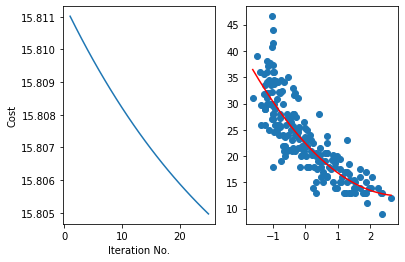

Error =  15.80496459368406 theta0 =  23.598000000000003 theta1 =  -15.45343536092876 theta2 =  9.413551994221312 



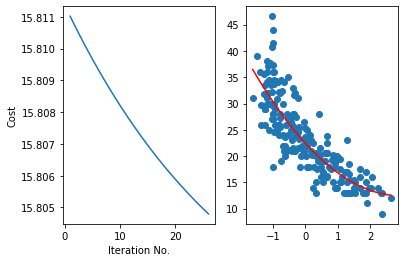

Error =  15.804796219824857 theta0 =  23.598000000000003 theta1 =  -15.46250606905678 theta2 =  9.42255369664683 



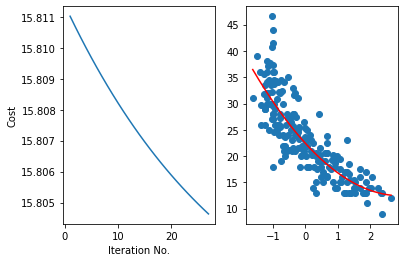

Error =  15.804632911432357 theta0 =  23.598000000000003 theta1 =  -15.471439290742886 theta2 =  9.431418958562944 



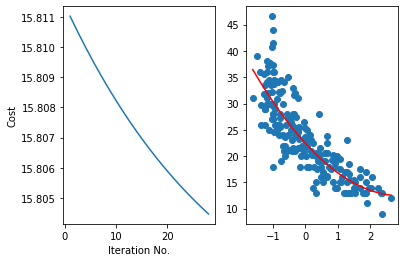

Error =  15.804474516113824 theta0 =  23.598000000000003 theta1 =  -15.480237109895132 theta2 =  9.440149848024307 



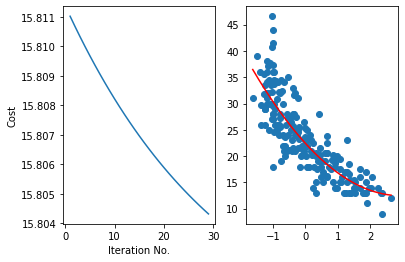

Error =  15.8043208860612 theta0 =  23.598000000000003 theta1 =  -15.48890157883538 theta2 =  9.448748401739682 



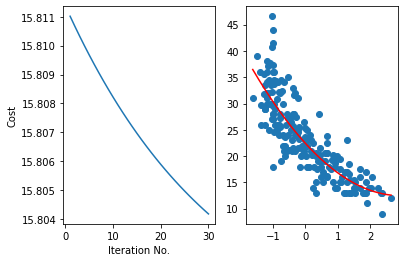

Error =  15.804171877913186 theta0 =  23.598000000000003 theta1 =  -15.497434718778065 theta2 =  9.457216625547044 



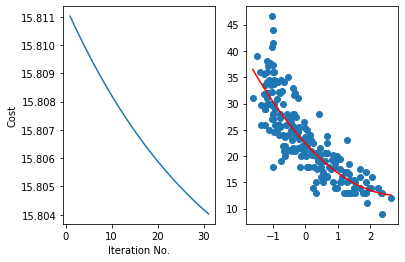

Error =  15.804027352621457 theta0 =  23.598000000000003 theta1 =  -15.505838520301685 theta2 =  9.46555649488151 



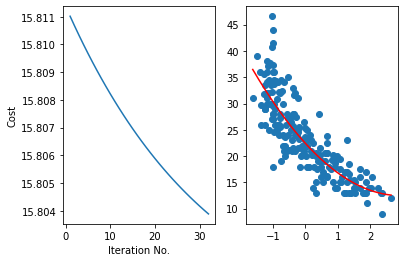

Error =  15.80388717532089 theta0 =  23.598000000000003 theta1 =  -15.51411494381317 theta2 =  9.473769955236142 



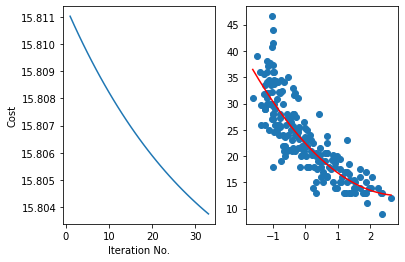

Error =  15.803751215203752 theta0 =  23.598000000000003 theta1 =  -15.522265920005182 theta2 =  9.481858922615803 



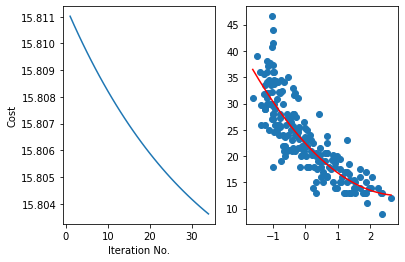

Error =  15.803619345397596 theta0 =  23.598000000000003 theta1 =  -15.530293350306517 theta2 =  9.489825283984105 



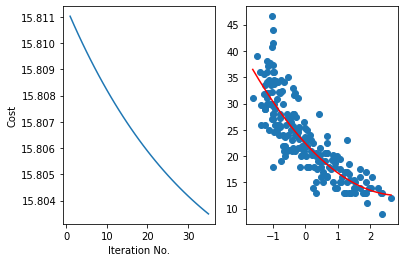

Error =  15.803491442846903 theta0 =  23.598000000000003 theta1 =  -15.53819910732565 theta2 =  9.497670897703594 



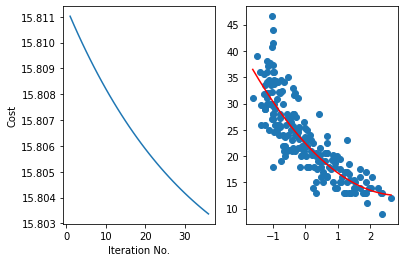

Error =  15.803367388198227 theta0 =  23.598000000000003 theta1 =  -15.545985035287574 theta2 =  9.505397593969267 



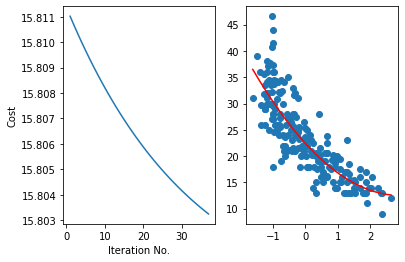

Error =  15.803247065688813 theta0 =  23.598000000000003 theta1 =  -15.553652950464018 theta2 =  9.5130071752355 



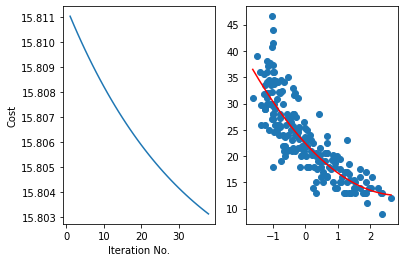

Error =  15.803130363038614 theta0 =  23.598000000000003 theta1 =  -15.561204641597133 theta2 =  9.520501416636536 



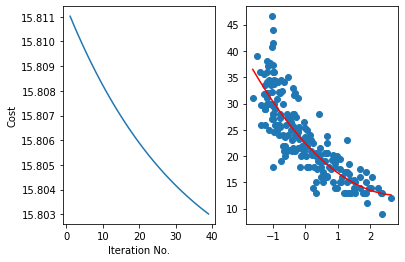

Error =  15.803017171345466 theta0 =  23.598000000000003 theta1 =  -15.568641870316766 theta2 =  9.527882066400567 



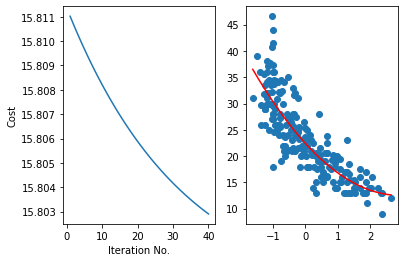

Error =  15.802907384983502 theta0 =  23.598000000000003 theta1 =  -15.57596637155141 theta2 =  9.535150846257558 



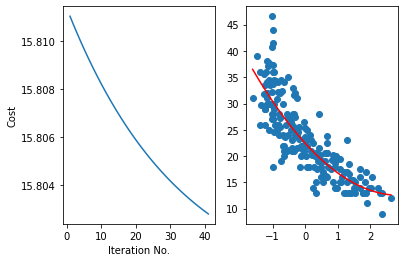

Error =  15.802800901504554 theta0 =  23.598000000000003 theta1 =  -15.583179853932911 theta2 =  9.542309451840888 



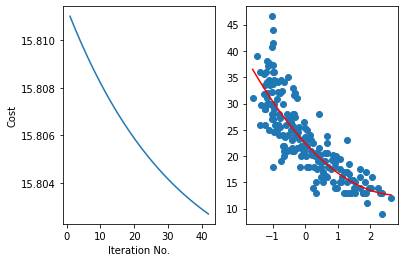

Error =  15.802697621542588 theta0 =  23.598000000000003 theta1 =  -15.59028400019507 theta2 =  9.549359553082903 



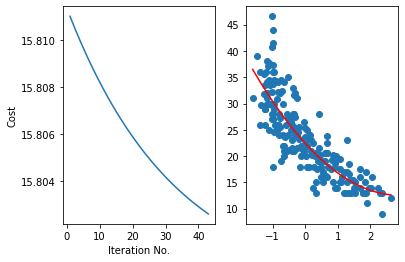

Error =  15.802597448720954 theta0 =  23.598000000000003 theta1 =  -15.597280467566161 theta2 =  9.556302794604461 



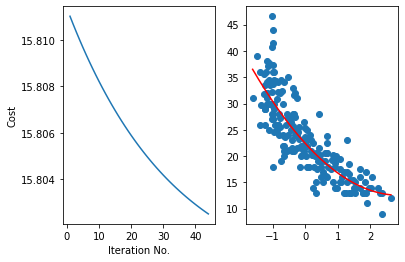

Error =  15.802500289562449 theta0 =  23.598000000000003 theta1 =  -15.604170888155542 theta2 =  9.563140796098597 



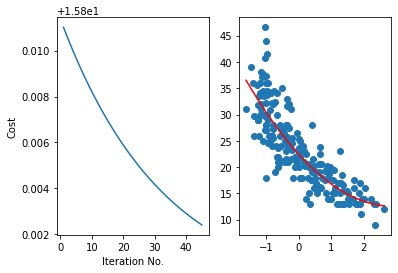

Error =  15.80240605340212 theta0 =  23.598000000000003 theta1 =  -15.610956869334379 theta2 =  9.569875152708347 



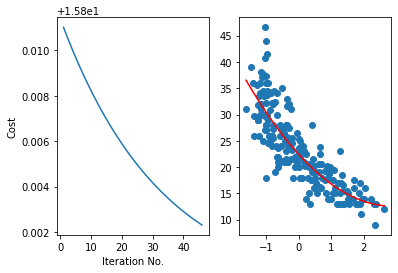

Error =  15.802314652302613 theta0 =  23.598000000000003 theta1 =  -15.617639994110604 theta2 =  9.576507435398865 



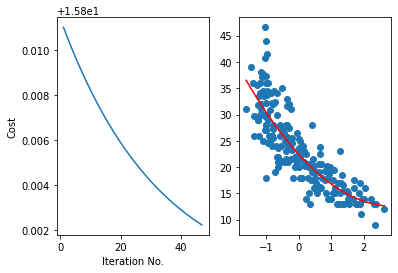

Error =  15.802226000972151 theta0 =  23.598000000000003 theta1 =  -15.624221821498207 theta2 =  9.583039191323884 



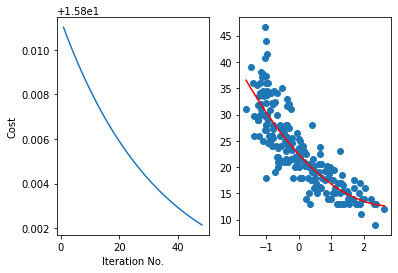

Error =  15.802140016684925 theta0 =  23.598000000000003 theta1 =  -15.630703886880898 theta2 =  9.58947194418664 



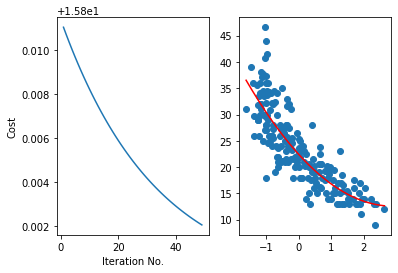

Error =  15.802056619203904 theta0 =  23.598000000000003 theta1 =  -15.637087702370293 theta2 =  9.595807194595308 



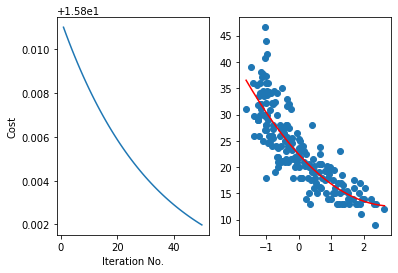

Error =  15.801975730705964 theta0 =  23.598000000000003 theta1 =  -15.64337475715864 theta2 =  9.602046420413059 



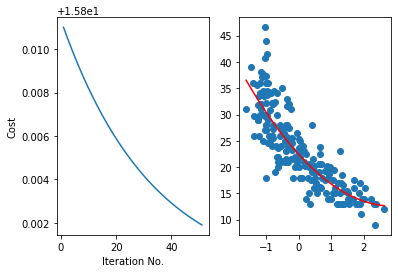

Error =  15.801897275709248 theta0 =  23.598000000000003 theta1 =  -15.64956651786622 theta2 =  9.608191077102813 



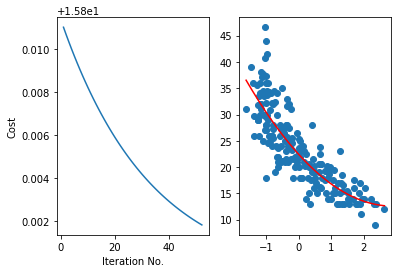

Error =  15.801821181002753 theta0 =  23.598000000000003 theta1 =  -15.655664428883473 theta2 =  9.614242598066765 



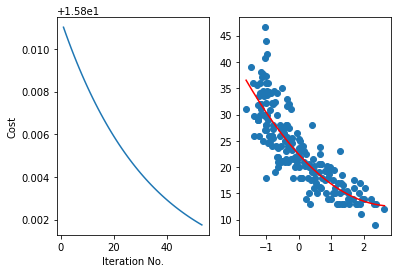

Error =  15.801747375578 theta0 =  23.598000000000003 theta1 =  -15.66166991270794 theta2 =  9.620202394980758 



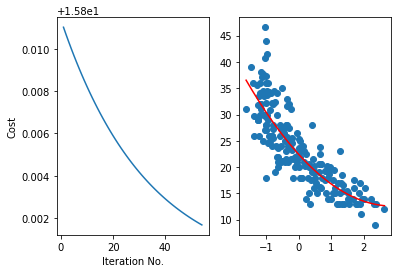

Error =  15.801675790562781 theta0 =  23.598000000000003 theta1 =  -15.667584370276094 theta2 =  9.626071858123598 



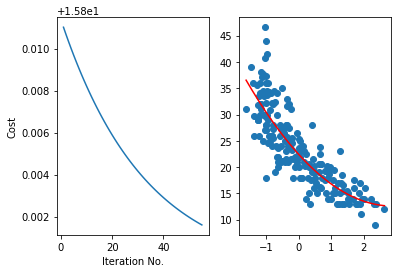

Error =  15.801606359156867 theta0 =  23.598000000000003 theta1 =  -15.673409181290152 theta2 =  9.631852356701375 



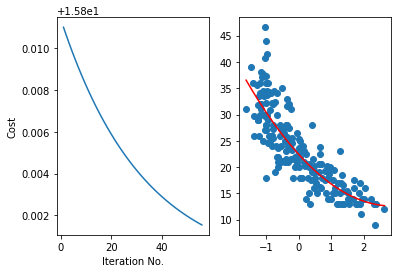

Error =  15.80153901656971 theta0 =  23.598000000000003 theta1 =  -15.679145704539922 theta2 =  9.637545239166855 



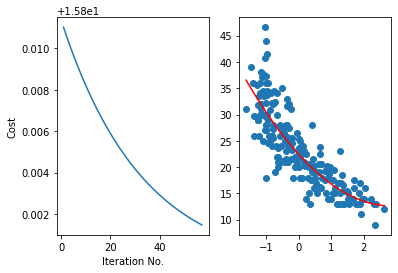

Error =  15.801473699959947 theta0 =  23.598000000000003 theta1 =  -15.684795278219775 theta2 =  9.643151833534056 



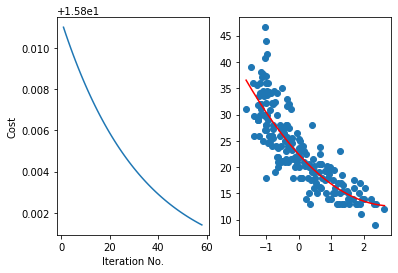

Error =  15.801410348376788 theta0 =  23.598000000000003 theta1 =  -15.690359220240822 theta2 =  9.648673447688035 



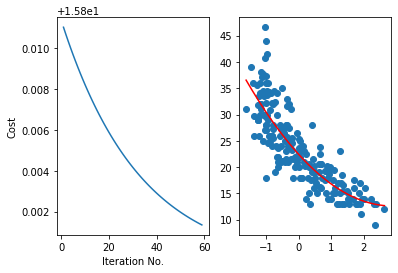

Error =  15.801348902703108 theta0 =  23.598000000000003 theta1 =  -15.695838828538339 theta2 =  9.654111369689987 



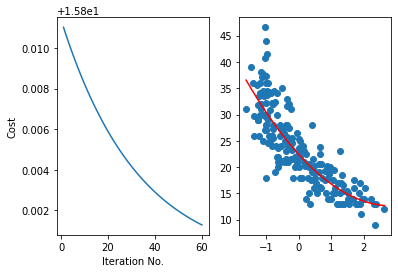

Error =  15.801289305600312 theta0 =  23.598000000000003 theta1 =  -15.701235381374554 theta2 =  9.659466868077718 



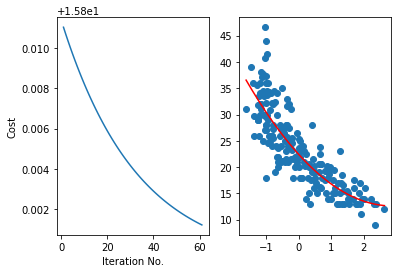

Error =  15.801231501454819 theta0 =  23.598000000000003 theta1 =  -15.706550137636833 theta2 =  9.66474119216157 



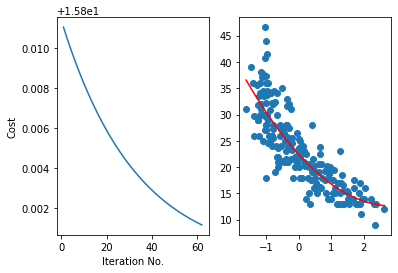

Error =  15.801175436326151 theta0 =  23.598000000000003 theta1 =  -15.711784337131347 theta2 =  9.669935572315845 



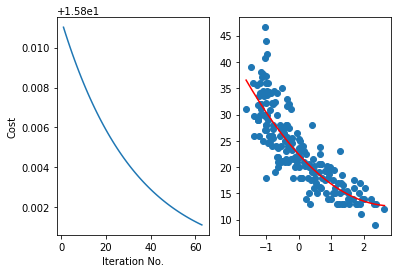

Error =  15.801121057896612 theta0 =  23.598000000000003 theta1 =  -15.71693920087229 theta2 =  9.675051220265834 



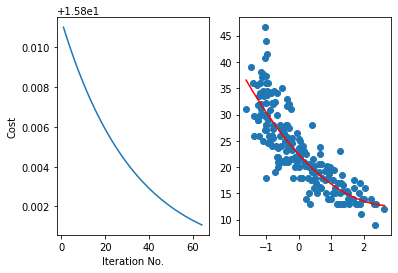

Error =  15.801068315422482 theta0 =  23.598000000000003 theta1 =  -15.72201593136671 theta2 =  9.680089329370476 



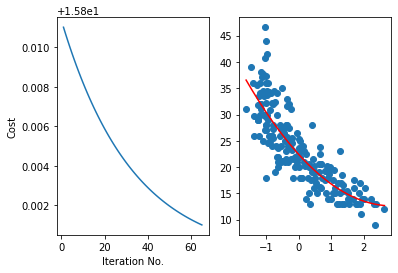

Error =  15.801017159686614 theta0 =  23.598000000000003 theta1 =  -15.727015712895033 theta2 =  9.685051074900743 



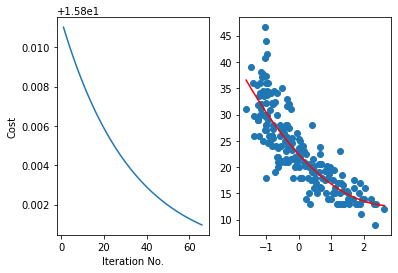

Error =  15.80096754295258 theta0 =  23.598000000000003 theta1 =  -15.731939711787318 theta2 =  9.689937614313802 



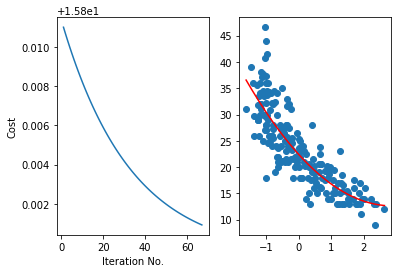

Error =  15.800919418920053 theta0 =  23.598000000000003 theta1 =  -15.73678907669534 theta2 =  9.694750087523024 



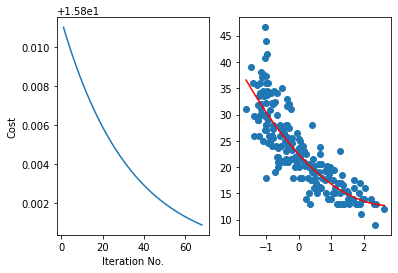

Error =  15.800872742681651 theta0 =  23.598000000000003 theta1 =  -15.741564938860542 theta2 =  9.699489617163895 



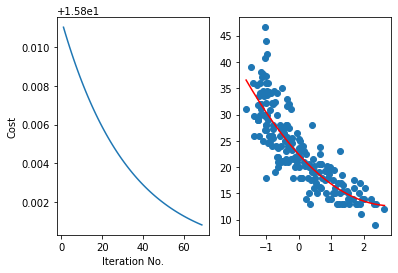

Error =  15.80082747068101 theta0 =  23.598000000000003 theta1 =  -15.746268412377923 theta2 =  9.704157308855901 



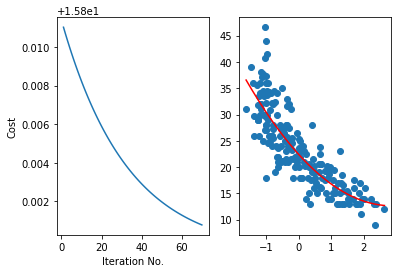

Error =  15.800783560672151 theta0 =  23.598000000000003 theta1 =  -15.750900594455937 theta2 =  9.708754251460448 



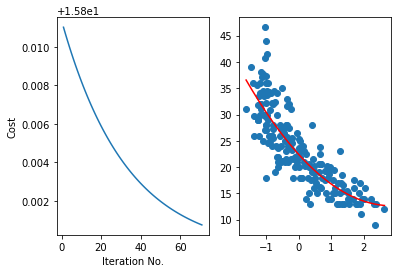

Error =  15.800740971680039 theta0 =  23.598000000000003 theta1 =  -15.755462565672437 theta2 =  9.713281517334856 



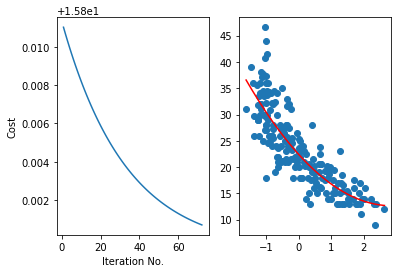

Error =  15.80069966396236 theta0 =  23.598000000000003 theta1 =  -15.759955390226756 theta2 =  9.717740162582531 



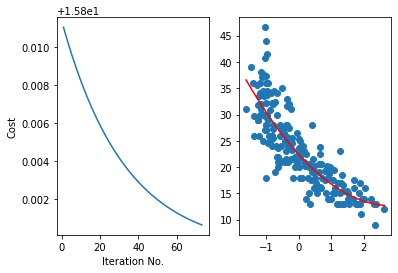

Error =  15.80065959897244 theta0 =  23.598000000000003 theta1 =  -15.764380116187956 theta2 =  9.722131227299315 



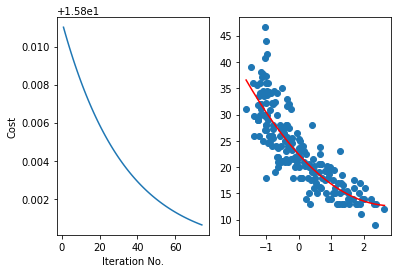

Error =  15.800620739323262 theta0 =  23.598000000000003 theta1 =  -15.768737775739318 theta2 =  9.726455735816119 



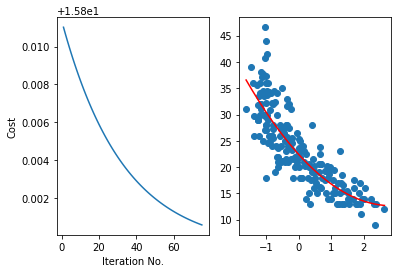

Error =  15.800583048752584 theta0 =  23.598000000000003 theta1 =  -15.773029385419122 theta2 =  9.730714696937879 



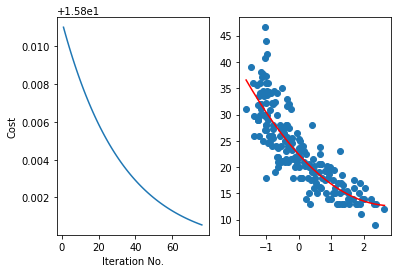

Error =  15.800546492089106 theta0 =  23.598000000000003 theta1 =  -15.777255946357789 theta2 =  9.734909104178882 



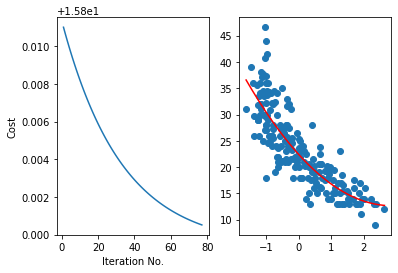

Error =  15.800511035219634 theta0 =  23.598000000000003 theta1 =  -15.781418444511413 theta2 =  9.739039935994532 



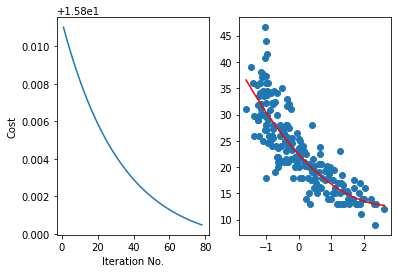

Error =  15.800476645057266 theta0 =  23.598000000000003 theta1 =  -15.785517850891766 theta2 =  9.743108156009596 



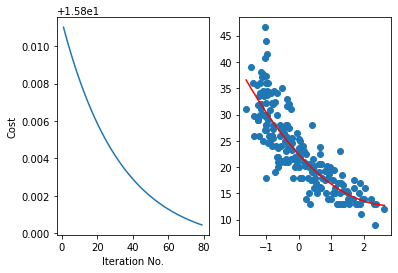

Error =  15.800443289510504 theta0 =  23.598000000000003 theta1 =  -15.789555121792814 theta2 =  9.747114713243002 



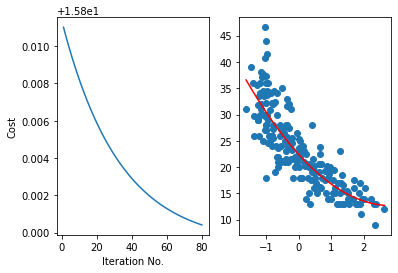

Error =  15.800410937453309 theta0 =  23.598000000000003 theta1 =  -15.793531199013788 theta2 =  9.751060542329215 



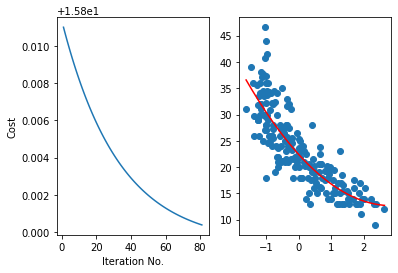

Error =  15.800379558696067 theta0 =  23.598000000000003 theta1 =  -15.797447010078894 theta2 =  9.75494656373627 



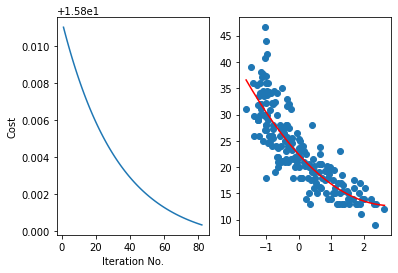

Error =  15.800349123957393 theta0 =  23.598000000000003 theta1 =  -15.801303468453677 theta2 =  9.758773683980493 



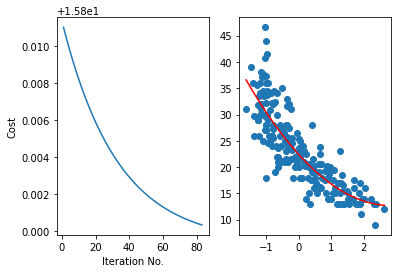

Error =  15.800319604836831 theta0 =  23.598000000000003 theta1 =  -15.805101473758107 theta2 =  9.76254279583797 



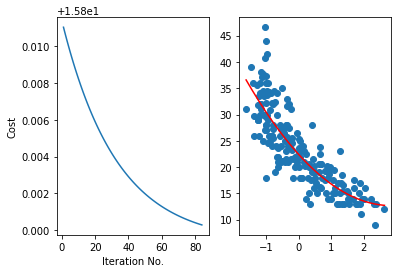

Error =  15.800290973788346 theta0 =  23.598000000000003 theta1 =  -15.808841911976453 theta2 =  9.76625477855281 



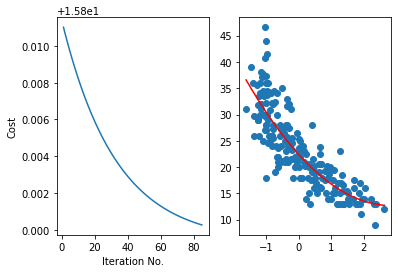

Error =  15.800263204094604 theta0 =  23.598000000000003 theta1 =  -15.812525655663942 theta2 =  9.769910498042254 



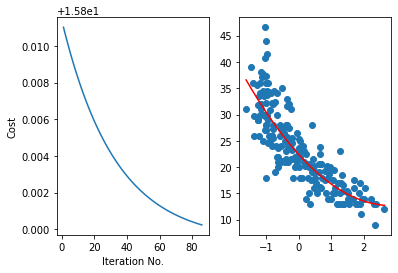

Error =  15.800236269842062 theta0 =  23.598000000000003 theta1 =  -15.816153564150325 theta2 =  9.773510807098672 



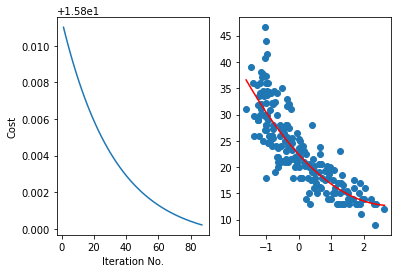

Error =  15.800210145896772 theta0 =  23.598000000000003 theta1 =  -15.819726483740325 theta2 =  9.777056545588497 



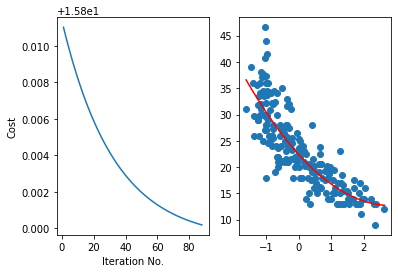

Error =  15.80018480788094 theta0 =  23.598000000000003 theta1 =  -15.823245247911064 theta2 =  9.780548540648146 



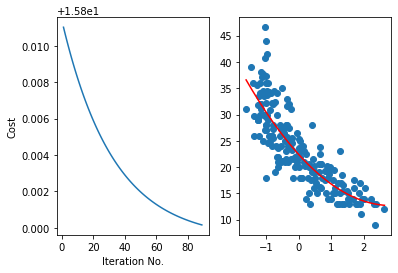

Error =  15.800160232150153 theta0 =  23.598000000000003 theta1 =  -15.826710677506492 theta2 =  9.783987606876973 



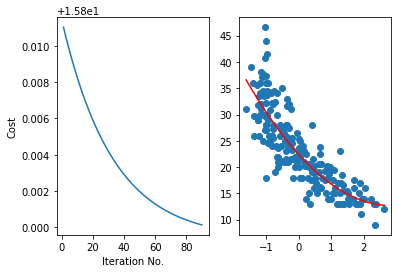

Error =  15.800136395771347 theta0 =  23.598000000000003 theta1 =  -15.830123580928875 theta2 =  9.7873745465273 



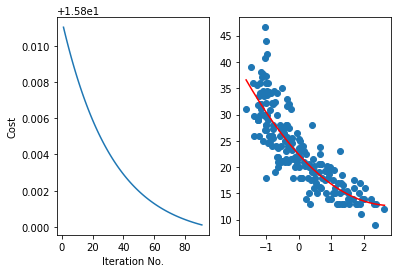

Error =  15.800113276501383 theta0 =  23.598000000000003 theta1 =  -15.833484754327372 theta2 =  9.790710149691552 



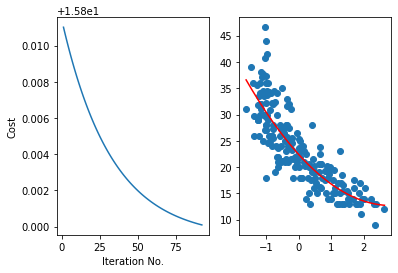

Error =  15.800090852766298 theta0 =  23.598000000000003 theta1 =  -15.836794981783756 theta2 =  9.793995194486579 



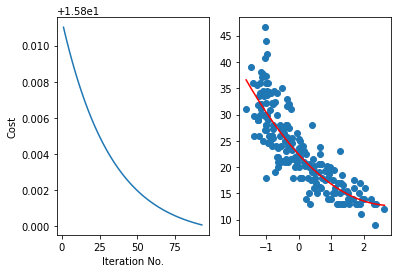

Error =  15.800069103641182 theta0 =  23.598000000000003 theta1 =  -15.840055035495325 theta2 =  9.797230447235158 



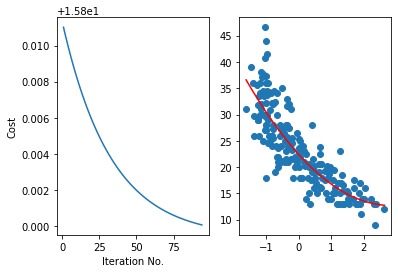

Error =  15.80004800883063 theta0 =  23.598000000000003 theta1 =  -15.843265675955037 theta2 =  9.800416662644778 



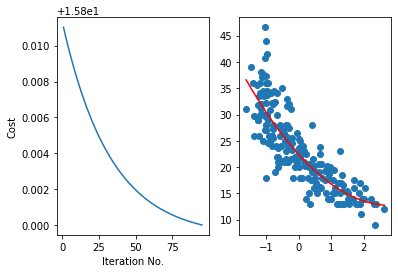

Error =  15.80002754864983 theta0 =  23.598000000000003 theta1 =  -15.846427652128915 theta2 =  9.803554583983676 



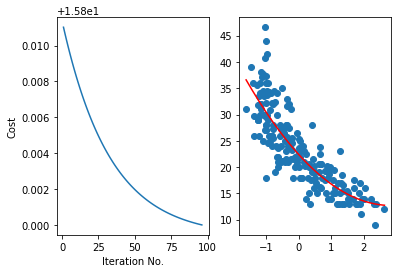

Error =  15.800007704006179 theta0 =  23.598000000000003 theta1 =  -15.84954170163076 theta2 =  9.80664494325423 



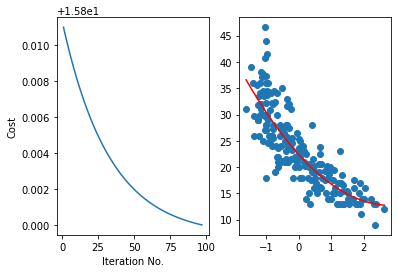

Error =  15.799988456381461 theta0 =  23.598000000000003 theta1 =  -15.85260855089422 theta2 =  9.809688461363727 



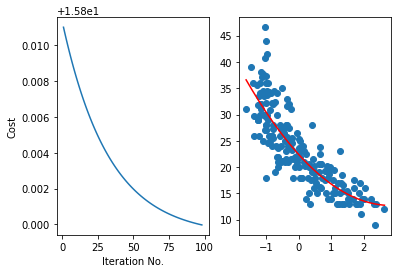

Error =  15.799969787814572 theta0 =  23.598000000000003 theta1 =  -15.855628915342253 theta2 =  9.81268584829252 



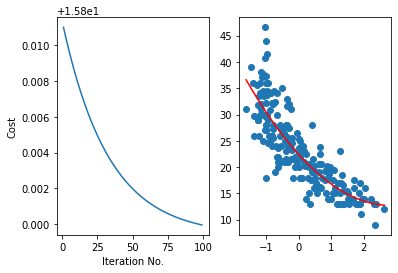

Error =  15.799951680884773 theta0 =  23.598000000000003 theta1 =  -15.858603499554018 theta2 =  9.815637803259657 



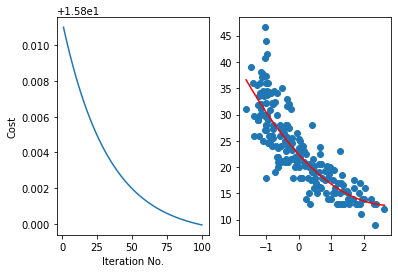

Error =  15.79993411869541 theta0 =  23.598000000000003 theta1 =  -15.86153299742923 theta2 =  9.818545014885988 



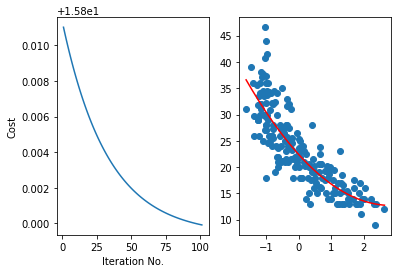

Error =  15.799917084858167 theta0 =  23.598000000000003 theta1 =  -15.864418092350032 theta2 =  9.821408161354809 



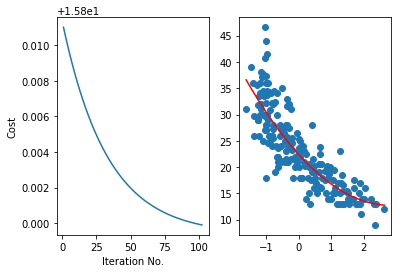

Error =  15.799900563477763 theta0 =  23.598000000000003 theta1 =  -15.86725945734042 theta2 =  9.824227910570059 



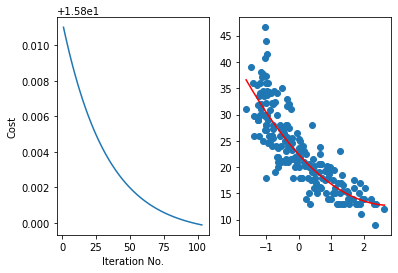

Error =  15.79988453913712 theta0 =  23.598000000000003 theta1 =  -15.870057755223236 theta2 =  9.827004920312138 



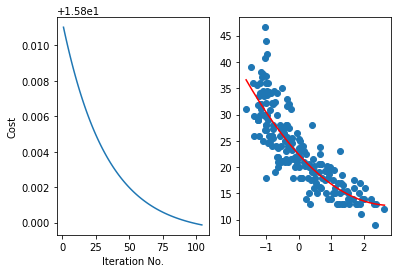

Error =  15.799868996882973 theta0 =  23.598000000000003 theta1 =  -15.87281363877479 theta2 =  9.829739838391339 



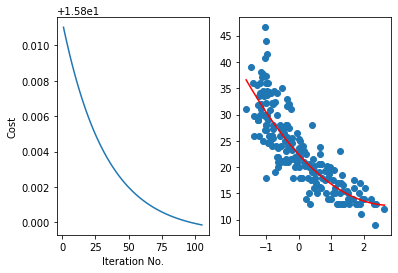

Error =  15.79985392221192 theta0 =  23.598000000000003 theta1 =  -15.87552775087714 theta2 =  9.832433302798972 



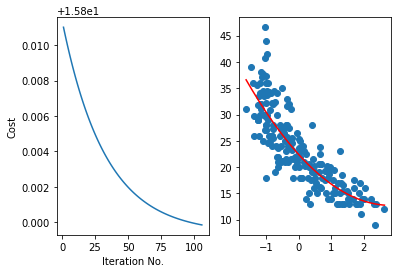

Error =  15.7998393010569 theta0 =  23.598000000000003 theta1 =  -15.878200724668055 theta2 =  9.835085941856192 



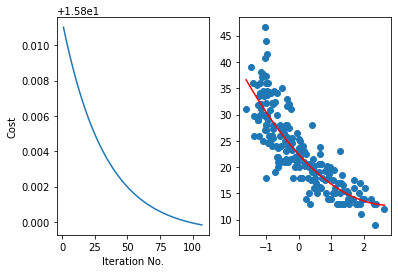

Error =  15.799825119774045 theta0 =  23.598000000000003 theta1 =  -15.880833183688718 theta2 =  9.83769837436057 



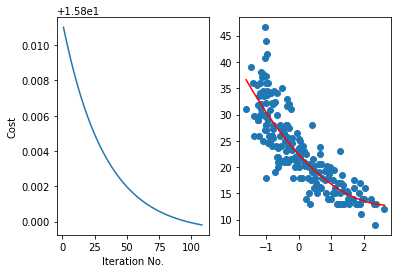

Error =  15.799811365129958 theta0 =  23.598000000000003 theta1 =  -15.883425742029177 theta2 =  9.840271209730448 



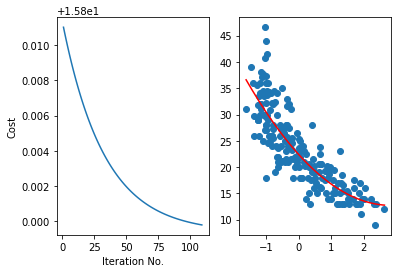

Error =  15.799798024289375 theta0 =  23.598000000000003 theta1 =  -15.885979004471602 theta2 =  9.842805048147095 



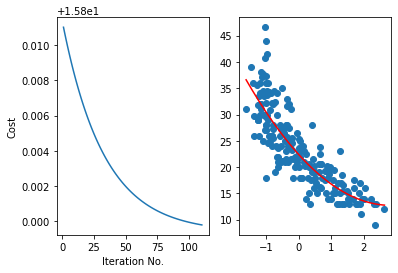

Error =  15.799785084803153 theta0 =  23.598000000000003 theta1 =  -15.888493566631368 theta2 =  9.845300480694721 



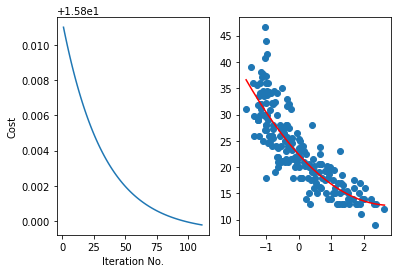

Error =  15.799772534596697 theta0 =  23.598000000000003 theta1 =  -15.890970015095991 theta2 =  9.847758089498361 



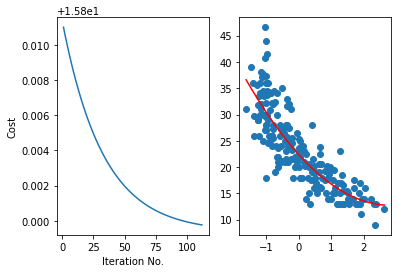

Error =  15.799760361958665 theta0 =  23.598000000000003 theta1 =  -15.893408927561973 theta2 =  9.85017844785967 



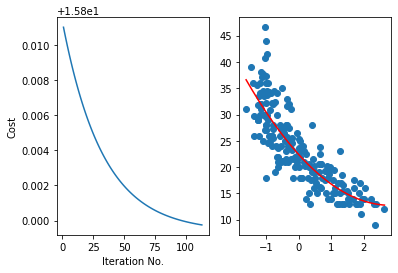

Error =  15.799748555530053 theta0 =  23.598000000000003 theta1 =  -15.895810872969555 theta2 =  9.852562120390662 



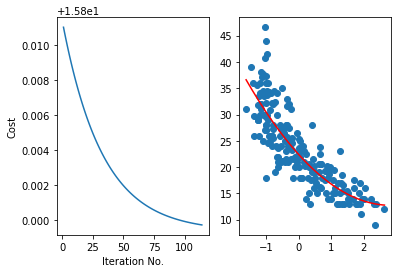

Error =  15.799737104293577 theta0 =  23.598000000000003 theta1 =  -15.898176411635449 theta2 =  9.854909663145417 



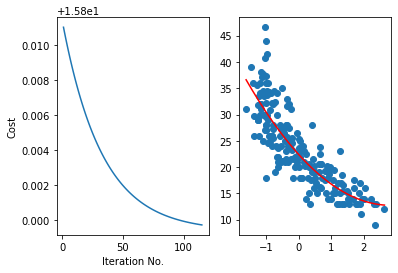

Error =  15.799725997563415 theta0 =  23.598000000000003 theta1 =  -15.900506095383536 theta2 =  9.8572216237498 



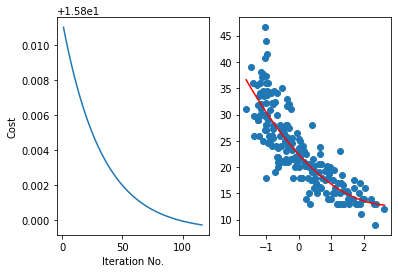

Error =  15.799715224975207 theta0 =  23.598000000000003 theta1 =  -15.902800467673599 theta2 =  9.859498541529208 



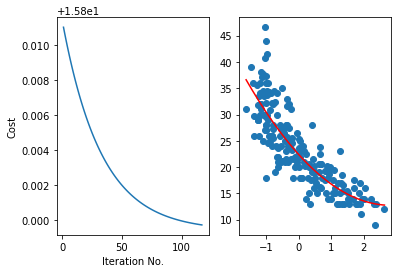

Error =  15.799704776476428 theta0 =  23.598000000000003 theta1 =  -15.905060063728099 theta2 =  9.861740947634377 



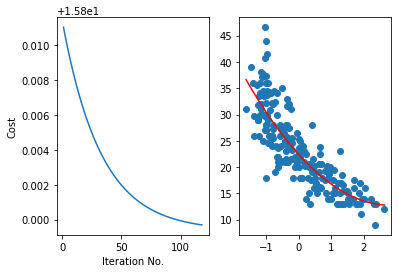

Error =  15.79969464231696 theta0 =  23.598000000000003 theta1 =  -15.907285410657028 theta2 =  9.863949365165295 



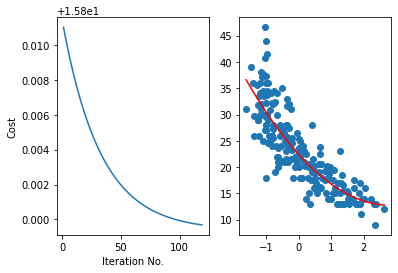

Error =  15.799684813040013 theta0 =  23.598000000000003 theta1 =  -15.909477027580872 theta2 =  9.866124309293221 



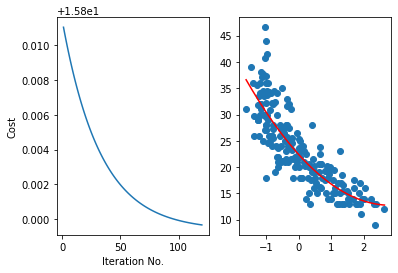

Error =  15.799675279473313 theta0 =  23.598000000000003 theta1 =  -15.91163542575171 theta2 =  9.86826628738087 



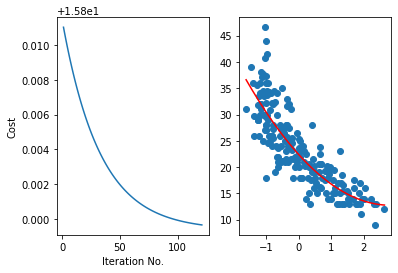

Error =  15.79966603272052 theta0 =  23.598000000000003 theta1 =  -15.913761108672476 theta2 =  9.870375799100758 



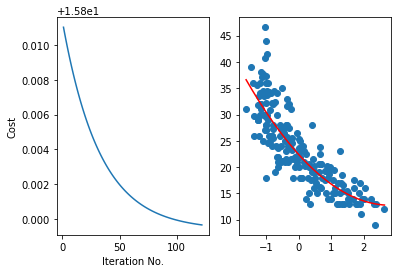

Error =  15.799657064152948 theta0 =  23.598000000000003 theta1 =  -15.915854572214414 theta2 =  9.872453336551773 



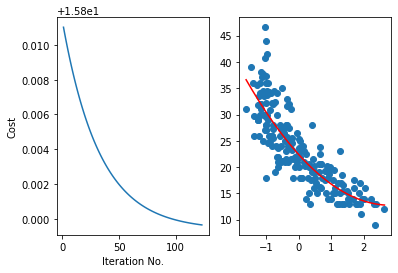

Error =  15.799648365401483 theta0 =  23.598000000000003 theta1 =  -15.917916304732755 theta2 =  9.87449938437397 



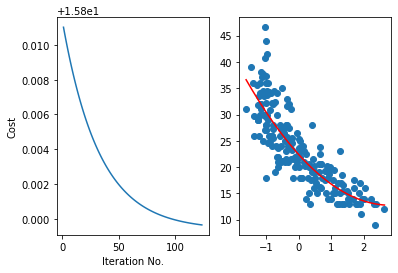

Error =  15.799639928348816 theta0 =  23.598000000000003 theta1 =  -15.919946787180635 theta2 =  9.876514419861618 



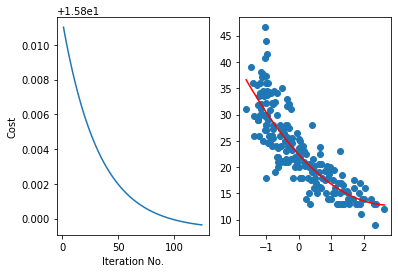

Error =  15.799631745121829 theta0 =  23.598000000000003 theta1 =  -15.921946493221295 theta2 =  9.878498913074548 



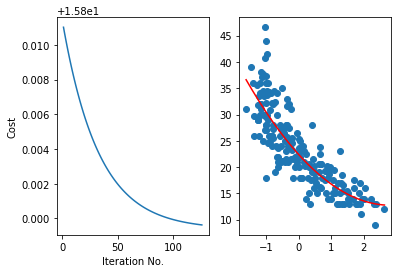

Error =  15.799623808084267 theta0 =  23.598000000000003 theta1 =  -15.92391588933857 theta2 =  9.880453326947807 



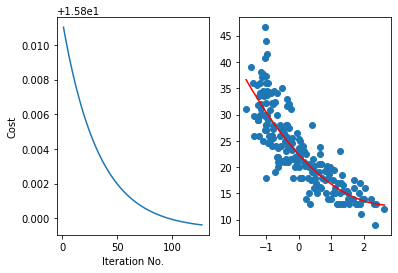

Error =  15.799616109829612 theta0 =  23.598000000000003 theta1 =  -15.925855434945714 theta2 =  9.882378117399647 



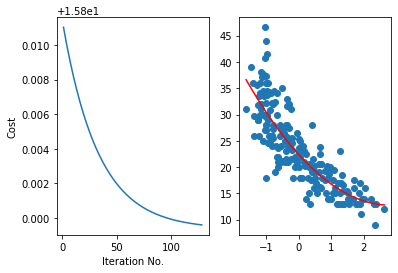

Error =  15.79960864317417 theta0 =  23.598000000000003 theta1 =  -15.927765582492565 theta2 =  9.884273733437878 



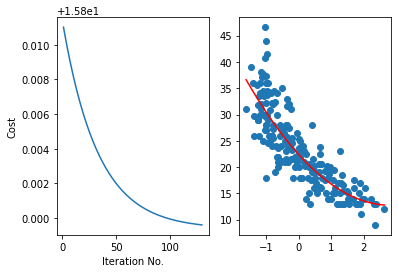

Error =  15.799601401150353 theta0 =  23.598000000000003 theta1 =  -15.929646777571094 theta2 =  9.886140617264616 



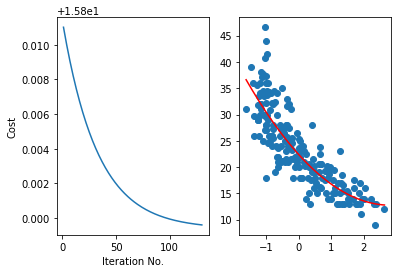

Error =  15.799594377000204 theta0 =  23.598000000000003 theta1 =  -15.931499459019347 theta2 =  9.887979204379434 



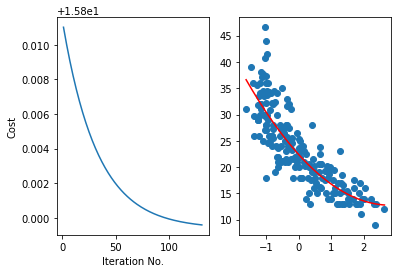

Error =  15.799587564169078 theta0 =  23.598000000000003 theta1 =  -15.933324059023823 theta2 =  9.889789923680956 



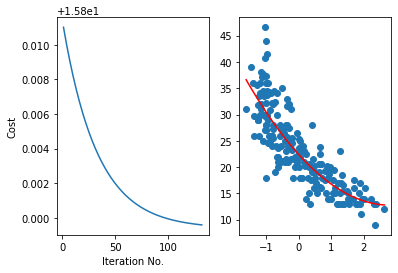

Error =  15.79958095629951 theta0 =  23.598000000000003 theta1 =  -15.935121003220285 theta2 =  9.891573197566911 



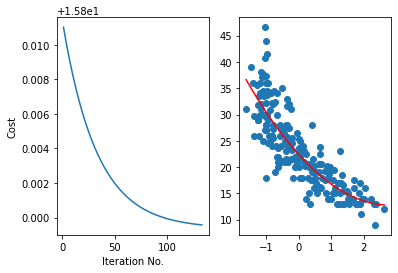

Error =  15.799574547225316 theta0 =  23.598000000000003 theta1 =  -15.936890710793056 theta2 =  9.893329442032663 



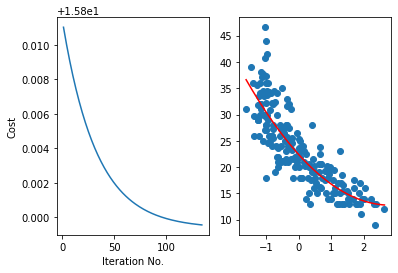

Error =  15.799568330965798 theta0 =  23.598000000000003 theta1 =  -15.938633594572805 theta2 =  9.895059066768253 



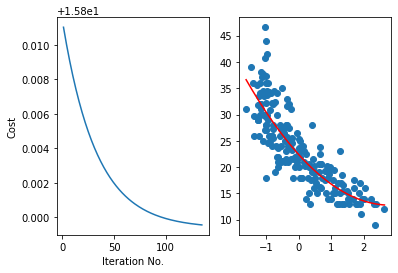

Error =  15.799562301720204 theta0 =  23.598000000000003 theta1 =  -15.940350061132841 theta2 =  9.89676247525398 



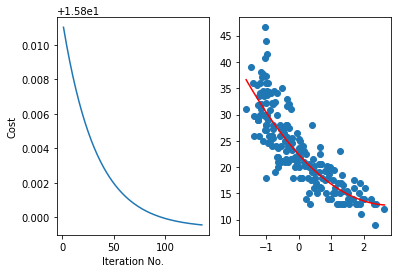

Error =  15.799556453862284 theta0 =  23.598000000000003 theta1 =  -15.942040510883974 theta2 =  9.898440064854507 



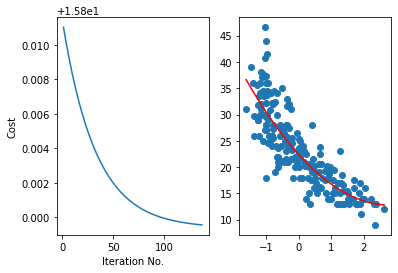

Error =  15.799550781935057 theta0 =  23.598000000000003 theta1 =  -15.943705338167904 theta2 =  9.90009222691157 



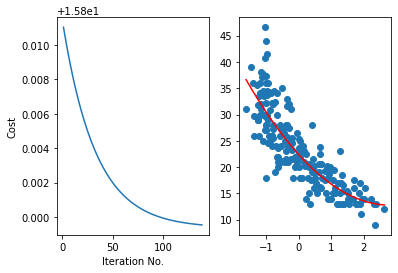

Error =  15.799545280645708 theta0 =  23.598000000000003 theta1 =  -15.94534493134922 theta2 =  9.901719346835264 



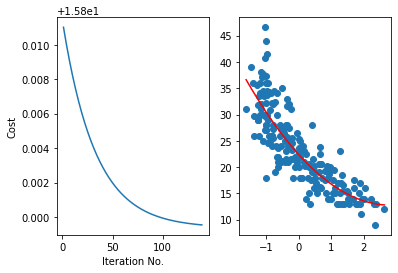

Error =  15.799539944860657 theta0 =  23.598000000000003 theta1 =  -15.946959672906 theta2 =  9.903321804193952 



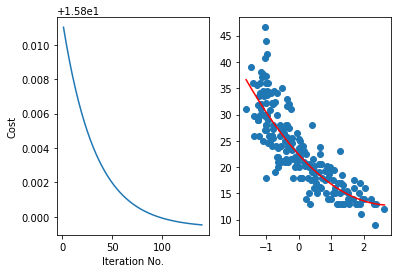

Error =  15.799534769600776 theta0 =  23.598000000000003 theta1 =  -15.948549939519026 theta2 =  9.904899972802804 



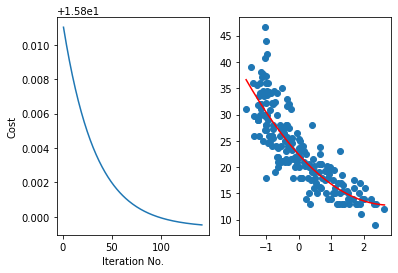

Error =  15.799529750036715 theta0 =  23.598000000000003 theta1 =  -15.950116102159658 theta2 =  9.906454220811003 



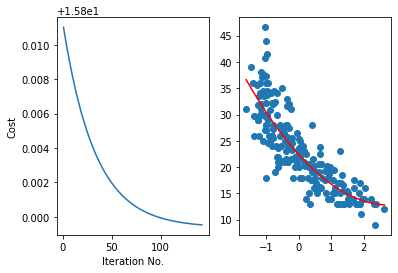

Error =  15.799524881484428 theta0 =  23.598000000000003 theta1 =  -15.951658526176372 theta2 =  9.907984910787626 



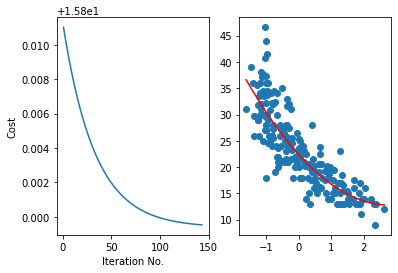

Error =  15.799520159400782 theta0 =  23.598000000000003 theta1 =  -15.953177571379989 theta2 =  9.90949239980622 



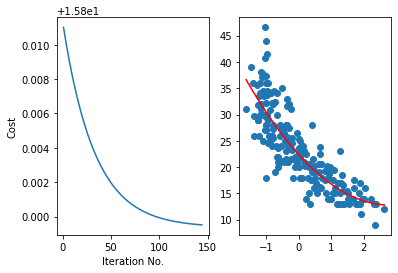

Error =  15.799515579379307 theta0 =  23.598000000000003 theta1 =  -15.954673592127609 theta2 =  9.910977039528104 



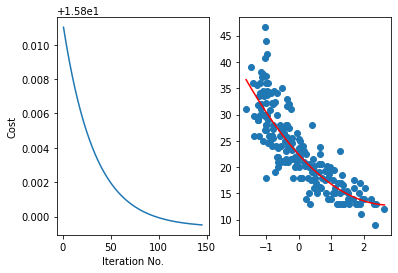

Error =  15.799511137146126 theta0 =  23.598000000000003 theta1 =  -15.956146937405276 theta2 =  9.9124391762844 



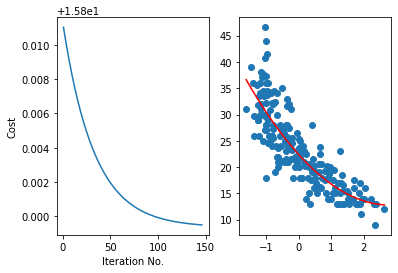

Error =  15.799506828555925 theta0 =  23.598000000000003 theta1 =  -15.957597950909383 theta2 =  9.913879151156817 



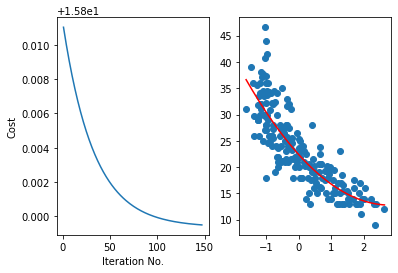

Error =  15.799502649588103 theta0 =  23.598000000000003 theta1 =  -15.959026971126855 theta2 =  9.915297300057231 



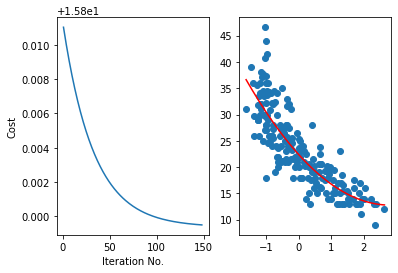

Error =  15.799498596343016 theta0 =  23.598000000000003 theta1 =  -15.960434331414104 theta2 =  9.916693953806035 



In [15]:
#Modification of the above linear regression code to add regularization.
iteration_Nos = range(1, 150)
err_F = [None] * len(iteration_Nos)

for i in iteration_Nos:
    h = ((1/L)*np.sum(np.square(theta0 + theta1*X1 + theta2*X2 - Y)))
    err_F[i-1] = h;
    theta0 = theta0 - (alpha/L)*np.sum((2*(theta0 + theta1*X1 + theta2*X2 - Y)));
    theta1 = theta1 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 - Y),X1));
    theta2 = theta2 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 - Y),X2));

    plt.clf()
    plt.subplot(1,2,1);
    plt.plot(range(1, i), err_F[1:i])
    plt.xlabel('Iteration No.')
    plt.ylabel('Cost')
    
    plt.subplot(1,2,2);
    plt.scatter(X1, Y)
    X_R = np.arange(np.min(train_setx['weight']),np.max(train_setx['weight']), 0.1);
    # create a x axis with  min to max
    X_R2 = np.square(X_R);
    X_R = (X_R-M1)/S1;
    X_R2 = (X_R2 - M2)/S2;
    plt.plot(X_R, theta0 + theta1*X_R+ theta2*X_R2, 'r');
    plt.show()
    #ploting the red line
    print('Error = ',h, 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2,'\n')                               

Error =  3.885900411663621 theta0 =  23.598000000000003 theta1 =  -11.632922842745312 theta2 =  7.854298434933582 theta3 =  -4.795442858621739 theta4 =  2.447631769991423 



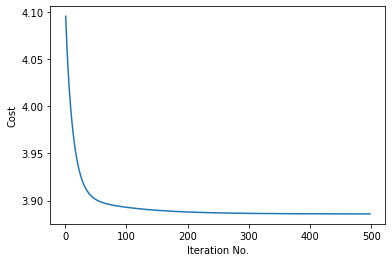

In [16]:
test_Set = cars[200:]
test_sety = test_Set['mpg'];
test_setx = test_Set.drop(columns = ['mpg'])

#initialization
import random
random.seed(1)
theta0 = random.uniform(-1,1);
theta1 = random.uniform(-1,1);
theta2 = random.uniform(-1,1);
theta3 = random.uniform(-1,1);
theta4 = random.uniform(-1,1);

#normalization
import numpy as np
X1 = train_setx['weight'];
X2 = np.square(train_setx['weight'])
X3 = train_setx['displacement'];
X4 = np.square(train_setx['displacement'])

M1= np.mean(X1);
S1 = np.std(X1);
X1 = (X1 - M1)/S1;
M2= np.mean(X2);
S2 = np.std(X2);
X2 = (X2 - M2)/S2;

M3= np.mean(X3);
S3 = np.std(X3);
X3 = (X3 - M3)/S3;

M4= np.mean(X4);
S4 = np.std(X4);
X4 = (X4 - M4)/S4;

Y = train_sety
L = len(X1)
alpha = 0.5;

#compututing cost functio and updating weights
iteration_Nos = range(1, 500)
err_F = [None] * len(iteration_Nos)
for i in iteration_Nos:
    h = ((1/L)*np.sum(np.square(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y)))
    err_F[i-1] = h;
    theta0 = theta0 - (alpha/L)*np.sum((2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y)));
    theta1 = theta1 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X1));
    theta2 = theta2 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X2));
    theta3 = theta3 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X3));
    theta4 = theta4 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X4));

    plt.clf()
    plt.plot(range(1, i), np.sqrt(err_F[1:i]))
    plt.xlabel('Iteration No.')
    plt.ylabel('Cost')


    #ploting the red line
print('Error = ',np.sqrt(h), 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2, 'theta3 = ', theta3, 'theta4 = ', theta4,'\n')


In [17]:

#normalization of test set
x1 = test_setx['weight'];
x2 = np.square(test_setx['weight'])
x3 = test_setx['displacement'];
x4 = np.square(test_setx['displacement'])

m1= np.mean(x1);
s1 = np.std(x1);
x1 = (x1 - m1)/s1;

m2= np.mean(x2);
s2 = np.std(x2);
x2 = (x2 - m2)/s2;

m3= np.mean(x3);
s3 = np.std(x3);
x3 = (x3 - m3)/s3;

m4= np.mean(x4);
s4 = np.std(x4);
x4 = (x4 - m4)/s4;

y = test_sety
l = len(x1)
#testing set error
h3 = ((1/l)*np.sum(np.square(theta0 + theta1*x1 + theta2*x2 + theta3*x3 + theta4*x4 - y)))
print('Testing set error using trained theta vector= ',np.sqrt(h3),'\n', 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2, 'theta3 = ', theta3, 'theta4 = ', theta4, '\n')

Testing set error using trained theta vector=  4.33953475957827 
 theta0 =  23.598000000000003 theta1 =  -11.632922842745312 theta2 =  7.854298434933582 theta3 =  -4.795442858621739 theta4 =  2.447631769991423 



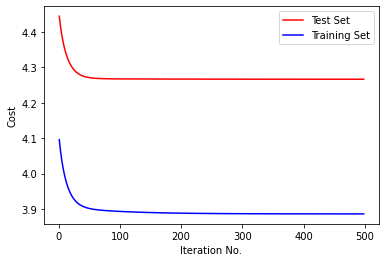

Training Set:  Error =  3.885900411663621 theta0 =  23.598000000000003 theta1 =  -11.632922842745312 theta2 =  7.854298434933582 theta3 =  -4.795442858621739 theta4 =  2.447631769991423 

Testing Set:  Error =  4.266221291409753 theta0 =  23.430303030303026 theta1 =  -10.268080427576855 theta2 =  5.528983853882577 theta3 =  -5.303893693217717 theta4 =  3.1882486708920768 



In [18]:

#Training set vs testing set
th0 = random.uniform(-1,1);
th1 = random.uniform(-1,1);
th2 = random.uniform(-1,1);
th3 = random.uniform(-1,1);
th4 = random.uniform(-1,1);

iteration_Nos = range(1, 500)
err_F2 = [None] * len(iteration_Nos)

for i in iteration_Nos:
    h2 = ((1/l)*np.sum(np.square(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y)))
    err_F2[i-1] = h2;
    th0 = th0 - (alpha/l)*np.sum((2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y)));
    th1 = th1 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x1));
    th2 = th2 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x2));
    th3 = th3 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x3));
    th4 = th4 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x4));

plt.plot(range(1, i), np.sqrt(err_F2[1:i]),'r',label='Test Set')
plt.plot(range(1, i), np.sqrt(err_F[1:i]),'b',label='Training Set')
plt.legend(loc="upper right")
plt.xlabel('Iteration No.')
plt.ylabel('Cost')
plt.show()

 #ploting the red line
print('Training Set: ','Error = ',np.sqrt(h), 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2, 'theta3 = ', theta3, 'theta4 = ', theta4, '\n')
print('Testing Set: ','Error = ',np.sqrt(h2), 'theta0 = ', th0, 'theta1 = ', th1, 'theta2 = ', th2, 'theta3 = ', th3, 'theta4 = ', th4, '\n')

In [22]:
x_Train = pd.DataFrame()
x_Train['weight'] = train_Set['weight']
x_Train['displacement'] = train_Set['displacement']
x_Train['weight_sqr'] = np.square(train_Set['weight'])
x_Train['displacement_Sqr'] = np.square(train_Set['displacement'])

x_Test = pd.DataFrame()
x_Test['weight'] = test_Set['weight']
x_Test['displacement'] = test_Set['displacement']
x_Test['weight_sqr'] = np.square(test_Set['weight'])
x_Test['displacement_Sqr'] = np.square(test_Set['displacement'])
from sklearn.linear_model import LinearRegression  #import LinearRegression module
from sklearn.metrics import mean_squared_error, r2_score  #import mean squared error

lin_model = LinearRegression()
lin_model.fit(x_Train, train_sety)  #apply linear regression on x_train dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_train_predict = lin_model.predict(x_Train)
rmse = (np.sqrt(mean_squared_error(train_sety, y_train_predict)))
r2 = r2_score(train_sety, y_train_predict)    #use r2_score function on train_sety and y_train_predict


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


y_test_predict = lin_model.predict(x_Test)    #perform above steps for test set
rmse = (np.sqrt(mean_squared_error(test_sety, y_test_predict)))
r2 = r2_score(test_sety, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

predict=theta0+theta1*x1+theta2*x2+theta3*x3+theta4*x4
predict=predict.reset_index(drop=True)
actual=y.reset_index(drop=True)
print('Predicted mpg: ',predict[4])
print('Actual mpg: ',actual[4])

The model performance for training set
--------------------------------------
RMSE is 3.885846238465098
R2 score is 0.724349024500449


The model performance for testing set
--------------------------------------
RMSE is 4.327418302907246
R2 score is 0.7210887553789513
Predicted mpg:  32.01790355325596
Actual mpg:  34.1


In [25]:

#Normal equation for training set
I=np.ones([len(Y)])
X=np.array([I,X1,X2,X3,X4])
XT=np.transpose(X)
ntheta=np.dot(np.dot(np.linalg.inv(np.dot(X,XT)),X),Y)
print('Original theta: ','\n','[ ',  theta0,' ', theta1,' ', theta2,' ', theta3,' ', theta4,' ]', '\n','\n')
print('Normal Equation theta: ',ntheta)

#Normal equation for testing set

i=np.ones([len(y)])
x=np.array([i,x1,x2,x3,x4])
xt=np.transpose(x)
ntheta2=np.dot(np.dot(np.linalg.inv(np.dot(x,xt)),x),y)
print('Original theta: ','\n','[ ',  th0,' ', th1,' ', th2,' ', th3,' ', th4,' ]', '\n','\n')
print('Normal Equation theta: ',ntheta2)

Original theta:  
 [  23.598000000000003   -11.632922842745312   7.854298434933582   -4.795442858621739   2.447631769991423  ] 
 

Normal Equation theta:  [ 23.598      -11.86869152   8.05674809  -4.64233929   2.32433532]
Original theta:  
 [  23.430303030303026   -10.268080427576855   5.528983853882577   -5.303893693217717   3.1882486708920768  ] 
 

Normal Equation theta:  [ 23.43030303 -10.45125748   5.69332312  -5.17444354   3.07567189]
